# Ford GoBike Usage Analysis
## by Gary Lau

## Investigation Overview

This investigation aims to uncover user behavior of using Ford GoBike, such as the main purpose for renting a GoBike, usage count at different time, etc.  

## Dataset Overview

This data set includes information about individual rides in Feb 2019 made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# data wrangling
# change to corrent Dtype
df['member_birth_year'] = df['member_birth_year'].astype('Int64')
for col in ['start_station_id', 'end_station_id', 'bike_id']:
    df[col] = df[col].astype('object')
for col in ['member_gender', 'bike_share_for_all_trip', 'user_type']:
    df[col] = df[col].astype("category")
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.start_time)
# drop row with invalid birth year (age >=100)
df = df[df['member_birth_year'] > 1919]

## Member's type and Gender distribution

91% are subscribers and only 9% are normal customers. Three out of four users are male.

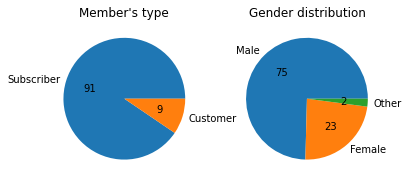

In [4]:
user_type = df.user_type.value_counts()
plt.subplot(1,2,1)
plt.pie(x=user_type, labels=user_type.index, autopct="%.f")
plt.title('Member\'s type')
plt.subplot(1,2,2)
gender = df.member_gender.value_counts()
plt.pie(x=gender, labels=gender.index, autopct="%.f")
plt.title('Gender distribution');

## Age

User's age follows a right-skew pattern with peak at age 25-35.

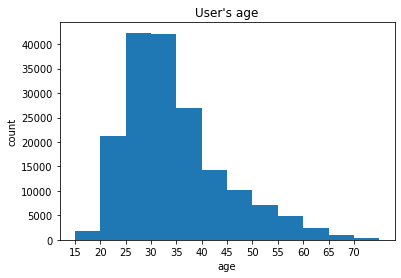

In [5]:
df['age'] = 2019 - df.member_birth_year
ticks = np.arange(15, 75, 5)
label = [v for v in range(15, 75, 5)]
bins = np.arange(15, 80, 5)
plt.hist(data=df.dropna(), x='age', bins=bins)
# plt.xlim(1960, df.member_birth_year.max()+5);
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(ticks, label)
plt.title('User\'s age');

## Hourly bike usage by weekday/weekend

The weekday hourly usage graph peak at 8 and 17, indicating most bike usage occur during rush hours, where people use bike for commuting to and from work. Meanwhile the weekend graph display a different shape: a bell shape during the day with peak around 13. Also the bike usage is significantly lower during weekend.

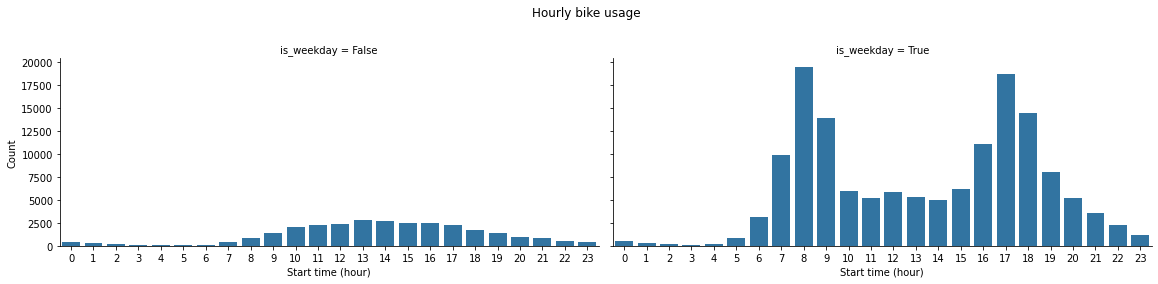

In [15]:
df['is_weekday'] = df['start_time_day_of_week'] <= 5
df['is_weekday']
g = sb.FacetGrid(data=df, col='is_weekday', height = 4, aspect=2)
g.map(sb.countplot, 'start_time_hour')
g.set_xlabels('Start time (hour)')
g.set_ylabels('Count')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Hourly bike usage');

## Day-of-week bike usage

From this visual, we are clearly see that bike usage on weekend are less than those on weekdays, suggesting the bikes are more likely to be used for commuting rather than lesuire. From marketing standpoint, it means the primary audience is workers. GoBike can introduce marketing strategy such as transfer discount with public transport to keep and increase this market. From operational standpoint, it means more maintainence work can be done on weekend.

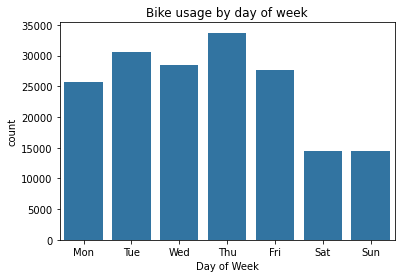

In [8]:
ticks = [v for v in range(0,7)]
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df, x='start_time_day_of_week', color=sb.color_palette()[0]);
plt.xlabel('Day of Week')
plt.xticks(ticks, labels)
plt.title('Bike usage by day of week');

## Riding duration on weekday/weekend

The data shows that even on weekend, user tend to have a short ride, indicating GoBike are most likely to be used for commuting rather than leisure. 

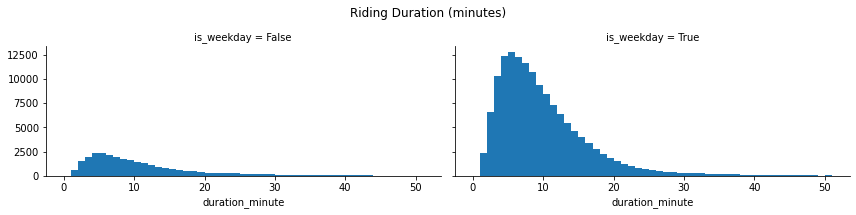

In [16]:
bins = np.arange(0, 52, 1)
g = sb.FacetGrid(data=df, col='is_weekday', aspect=2)
g.map(plt.hist, 'duration_minute', bins=bins)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Riding Duration (minutes)');

### Hourly bike usage by member's type

We can see that the pattern are very similar for subscribers and causal users.

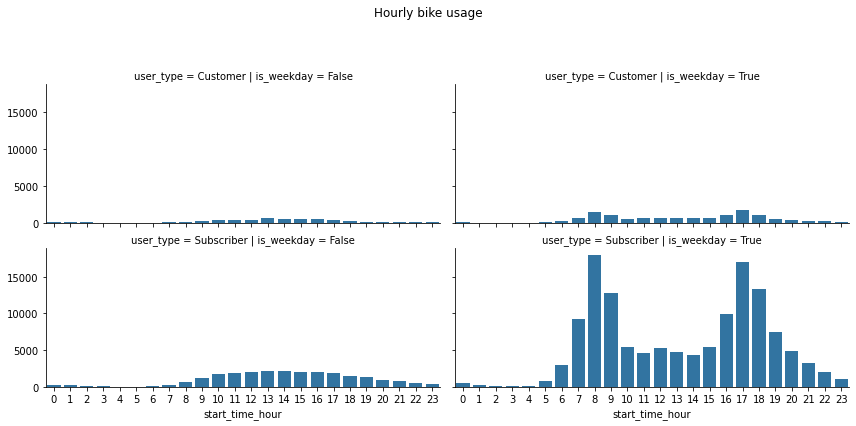

In [11]:
g = sb.FacetGrid(data=df, row='user_type', col='is_weekday', aspect=2)
g.map(sb.countplot, 'start_time_hour')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Hourly bike usage');

### Conclusion

GoBike is primarily be used for commuting purpose. It might be due to the model of the bike and hilly terrain around the Bay area. Hence, from marketing standpoint, it means the primary audience is workers. GoBike can introduce marketing strategy such as transfer discount with public transport to keep and increase this market. From operational standpoint, it means more maintainence work can be done on weekend.